# K-Means Clustering

## Importing the libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Importing the Dataset

In [35]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [36]:

X = df.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the elbow method to find the optimal number of clusters

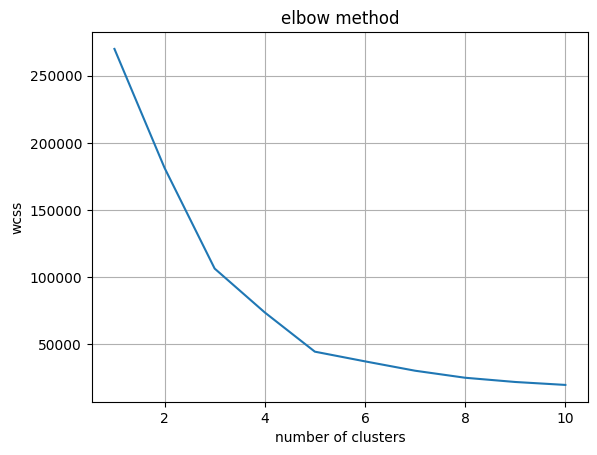

In [37]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1,11), wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()


## Training the K-Means model on the dataset

In [38]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

kmeans.inertia_

44448.4554479337

In [39]:
y_kmeans.size

200

## Visualising the clusters

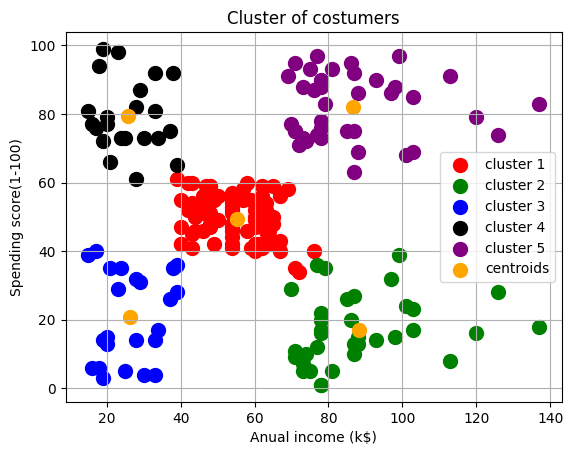

In [40]:
#en este caso, se debe de colocar cada variable de esta manera 
#ya que así se puede seleccionar la respectiva columna y cada fila que corresponda con el cluster
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c= 'red',   label='cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c= 'green', label='cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c= 'blue',  label='cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c= 'black', label='cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c= 'purple',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c= 'orange',label='centroids')
plt.title('Cluster of costumers')
plt.xlabel('Anual income (k$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.grid()
plt.show()


